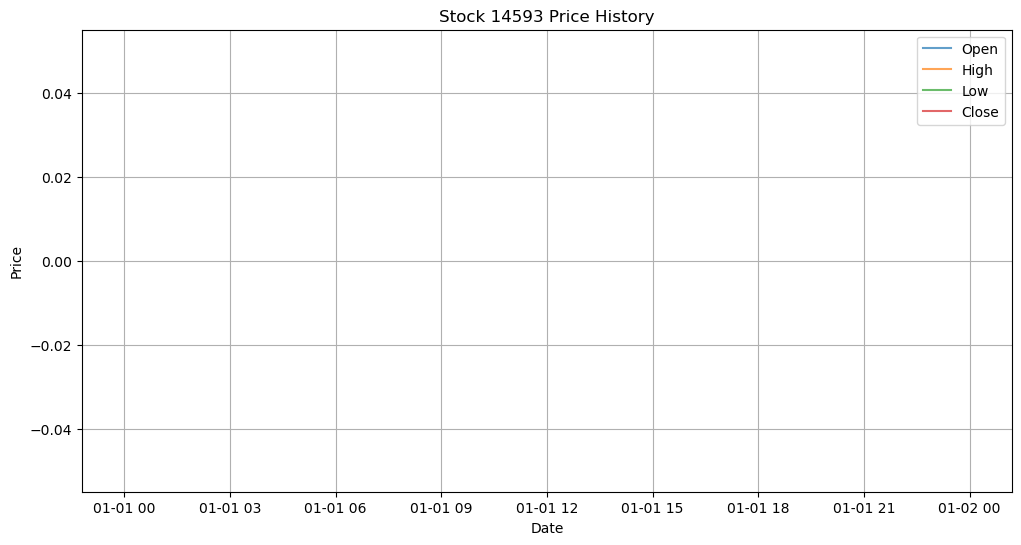

/tmp/ipykernel_1580298/3722016865.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data_length.index.astype(str), x=data_length.values, palette='viridis')


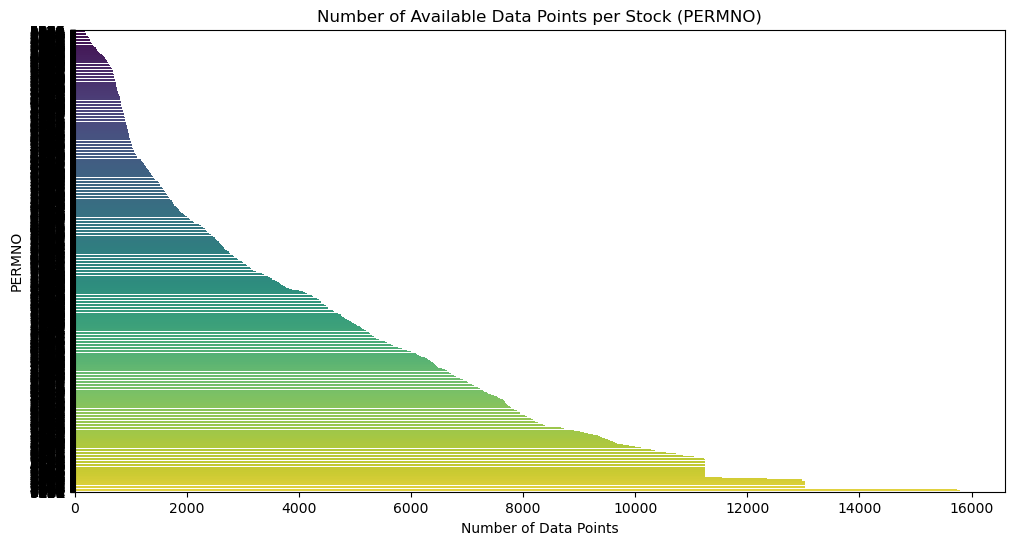

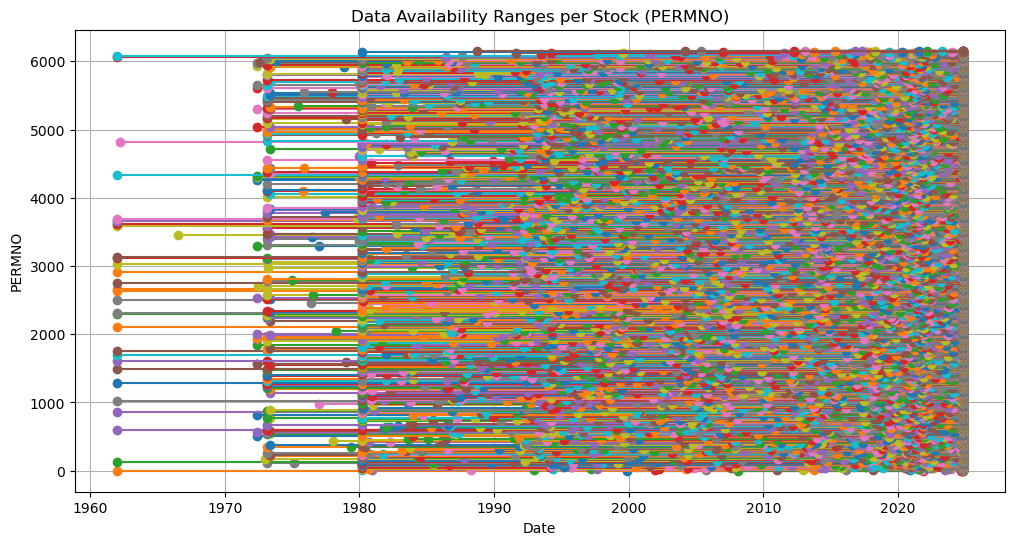

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """Load the stock data from a CSV file."""
    data = pd.read_csv(file_path, parse_dates=['date'])
    return data

def plot_price_history(stock_data, permno):
    """Plot BIDLO, ASKHI, PRC, and OPENPRC for a specific stock."""
    stock = stock_data[stock_data['PERMNO'] == permno]

    plt.figure(figsize=(12, 6))
    plt.plot(stock['date'], stock['OPENPRC'], label='Open', alpha=0.7)
    plt.plot(stock['date'], stock['ASKHI'], label='High', alpha=0.7)
    plt.plot(stock['date'], stock['BIDLO'], label='Low', alpha=0.7)
    plt.plot(stock['date'], stock['PRC'], label='Close', alpha=0.7)
    plt.legend(loc='best')
    plt.title(f'Stock {permno} Price History')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

def plot_data_length(stock_data):
    """Plot the length of data available for each stock."""
    data_length = stock_data.groupby('PERMNO')['date'].nunique().sort_values()

    plt.figure(figsize=(12, 6))
    sns.barplot(y=data_length.index.astype(str), x=data_length.values, palette='viridis')
    plt.title('Number of Available Data Points per Stock (PERMNO)')
    plt.xlabel('Number of Data Points')
    plt.ylabel('PERMNO')
    plt.show()

def plot_date_ranges(stock_data):
    """Plot the date ranges for which data is available for each stock."""
    date_ranges = stock_data.groupby('PERMNO').agg(start=('date', 'min'), end=('date', 'max')).reset_index()

    plt.figure(figsize=(12, 6))
    for _, row in date_ranges.iterrows():
        plt.plot([row['start'], row['end']], [row['PERMNO'], row['PERMNO']], marker='o')

    plt.title('Data Availability Ranges per Stock (PERMNO)')
    plt.xlabel('Date')
    plt.ylabel('PERMNO')
    plt.grid(True)
    plt.show()

def main():
    # Load the data
    file_path = 'all_data.csv'  # Replace with your file path
    stock_data = load_data(file_path)

    # Set the PERMNO you want to visualize
    permno = 14593  # Replace with the desired PERMNO

    # Visualize the data
    plot_price_history(stock_data, permno)
    plot_data_length(stock_data)
    plot_date_ranges(stock_data)

if __name__ == "__main__":
    main()


In [9]:
file_path = 'filtered_stock_1985.csv'  # Replace with your file path
stock_data = load_data(file_path)

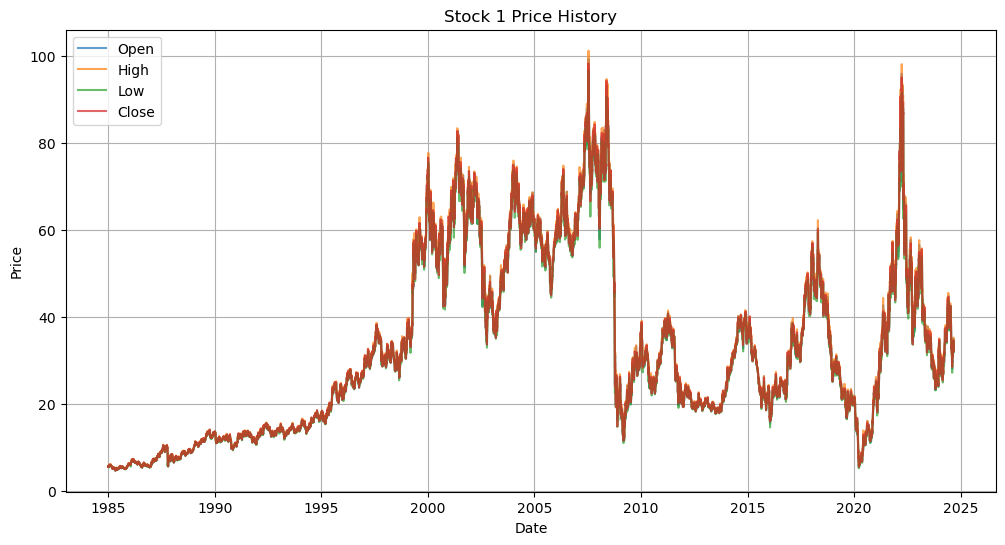

In [10]:
plot_price_history(stock_data, 1)

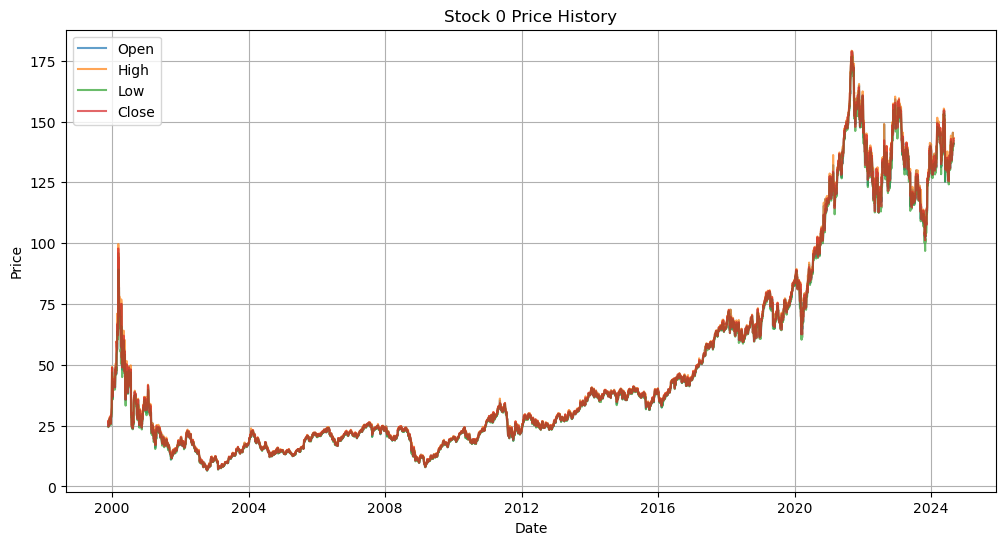

In [14]:
# Set the PERMNO you want to visualize
permno = 0  # Replace with the desired PERMNO

# Visualize the data
plot_price_history(stock_data, permno)


/tmp/ipykernel_1580298/3722016865.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data_length.index.astype(str), x=data_length.values, palette='viridis')


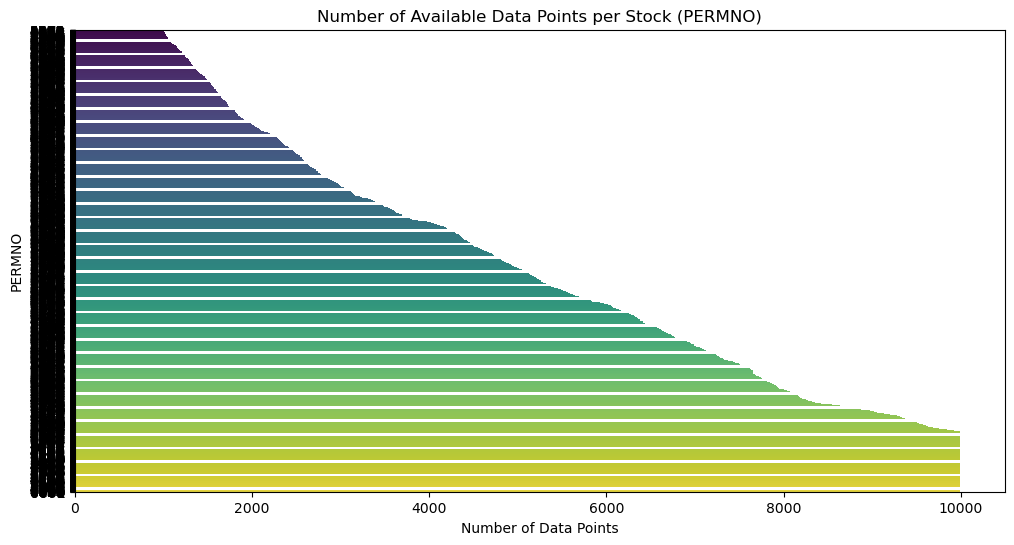

In [11]:
plot_data_length(stock_data)


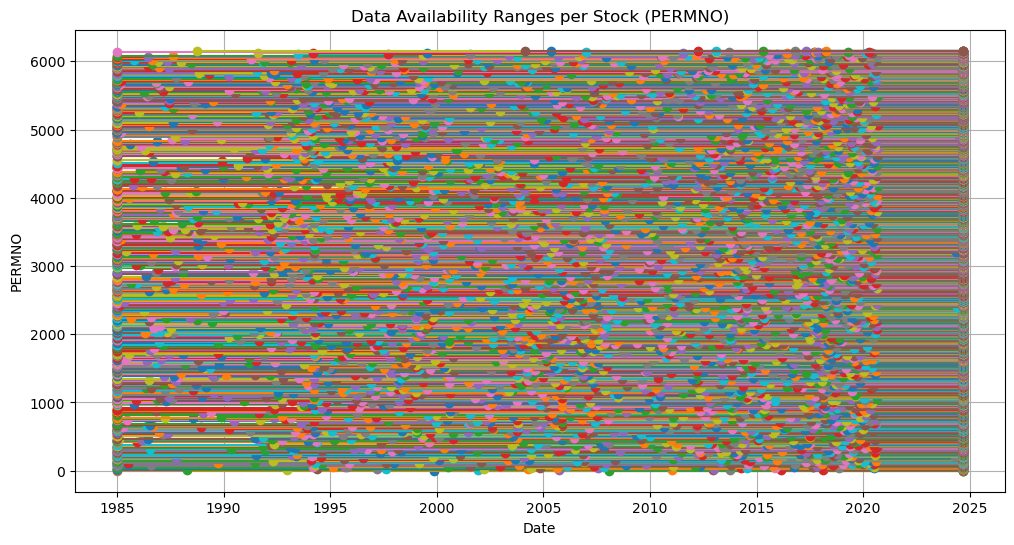

In [12]:
plot_date_ranges(stock_data)

In [8]:
us_ret

,Date,StockID,Low,High,Close,Vol,Shares,Open,Ret,MarketCap,...,Ret_month,Ret_quarter,Ret_year,Ret_5d,Ret_20d,Ret_60d,Ret_65d,Ret_180d,Ret_250d,Ret_260d
0,1985-01-02,1,5.520,5.633,5.520,279650.0,NaN,5.596,-0.014,NaN,...,NaN,NaN,NaN,0.025252,0.068656,-0.060027,-0.035552,-0.057351,0.113820,0.101161
1,1985-01-02,1004,1.585,1.601,1.585,12814.0,NaN,NaN,-0.029,NaN,...,NaN,NaN,NaN,0.030097,0.140979,0.270089,0.374783,0.136983,0.320233,0.408542
2,1985-01-02,1016,0.895,0.895,0.895,13200.0,NaN,0.895,0.000,NaN,...,NaN,NaN,NaN,0.009223,0.159632,0.319429,0.302277,0.686962,0.861958,0.908591
3,1985-01-02,1017,0.433,0.439,0.437,1180800.0,NaN,0.437,0.000,NaN,...,NaN,NaN,NaN,-0.015364,0.094631,0.023336,0.022464,0.113492,0.369712,0.425809
4,1985-01-02,1034,0.702,0.702,0.702,6834.0,NaN,0.702,0.027,NaN,...,NaN,NaN,NaN,-0.034712,0.112347,-0.006131,-0.032301,-0.273319,-0.024784,-0.024690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23787879,2024-08-30,995,39.690,40.140,40.120,4417.0,NaN,40.120,-0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23787880,2024-08-30,996,37.070,37.970,37.240,437600.0,NaN,37.930,-0.014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23787881,2024-08-30,997,89.090,94.890,91.020,757100.0,NaN,94.590,-0.022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23787882,2024-08-30,998,0.870,1.010,0.922,5863000.0,NaN,1.000,-0.087,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TRAIN = '2018-01-01'

path = 'processed_data/us_ret.feather'
data = pd.read_feather(path)

data = data[data['Date'] >= TRAIN]

us_ret = data.pivot(index='Date', columns='StockID', values='Ret')
us_ret = us_ret.fillna(0)
us_ret.index = pd.to_datetime(us_ret.index)

stock_prices = data.pivot(index='Date', columns='StockID', values='Close')
# 결측치 앞에서 채우기
stock_prices = stock_prices.fillna(method='ffill')
stock_prices = stock_prices.loc[stock_prices.index]

/tmp/ipykernel_22815/1603252851.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_prices = stock_prices.fillna(method='ffill')


In [57]:
import pandas as pd
import numpy as np

# ticker_stockid.csv 파일 읽기
ticker_stockid = pd.read_csv('Dataset/raw_data/ticker_stockid.csv')
ticker_stockid['StockID'] = ticker_stockid['StockID'].astype(str)
ticker_map = dict(zip(ticker_stockid['StockID'], ticker_stockid['TICKER']))

# 수익률 데이터에 Ticker 추가
us_ret_with_ticker = us_ret.copy()
us_ret_with_ticker.columns = [ticker_map.get(col, col) for col in us_ret_with_ticker.columns]

# 전체 기간 동안의 누적 수익률 계산
cumulative_returns = (1 + us_ret_with_ticker).cumprod()
total_returns = cumulative_returns.iloc[-1] - 1

# 비정상적인 수익률을 보인 주식 찾기
threshold_high = np.percentile(total_returns, 10)  # 상위 5% 임계값
threshold_low = np.percentile(total_returns, 10)    # 하위 5% 임계값

# 일별 수익률에서 극단적인 값 찾기
daily_max = us_ret_with_ticker.max()
daily_min = us_ret_with_ticker.min()

extreme_high = daily_max[daily_max > 1].sort_values(ascending=False)  # 100% 이상의 일일 수익률
extreme_low = daily_min[daily_min < -0.5].sort_values()  # -50% 이하의 일일 수익률

print("\n극단적으로 높은 일일 수익률을 보인 주식들:")
print(extreme_high)
print("\n극단적으로 낮은 일일 수익률을 보인 주식들:")
print(extreme_low)


극단적으로 높은 일일 수익률을 보인 주식들:
NCPL    2665.667
ODV      969.000
ORLA     829.000
CHRD     257.333
SECO     249.000
          ...   
WKEY       1.008
BHRB       1.006
BITF       1.005
IPWR       1.002
NAUT       1.001
Length: 484, dtype: float64

극단적으로 낮은 일일 수익률을 보인 주식들:
CIO    -0.9999
AIV    -0.9999
NCPL   -0.9999
FUV    -0.9990
ORLA   -0.9990
         ...  
NAAS   -0.5040
KIRK   -0.5040
FENC   -0.5040
GRTS   -0.5030
ETWO   -0.5010
Length: 465, dtype: float64


In [58]:
# 수익률 데이터에 Ticker 추가
stock_prices_with_ticker = stock_prices.copy()
stock_prices_with_ticker.columns = [ticker_map.get(col, col) for col in stock_prices_with_ticker.columns]

<Axes: xlabel='Date'>

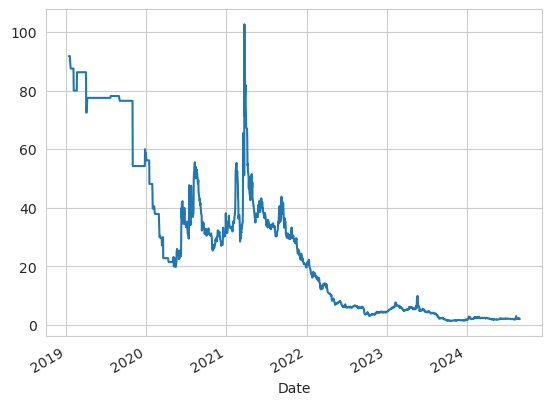

In [70]:
stock_prices_with_ticker['WKEY'].plot()

In [66]:
stock_prices_with_ticker['NCPL']

Date
2018-01-02    560.00
2018-01-03    420.00
2018-01-04    700.00
2018-01-05    840.00
2018-01-08    840.00
               ...  
2024-08-26      3.46
2024-08-27      3.38
2024-08-28      3.12
2024-08-29      3.20
2024-08-30      3.17
Name: NCPL, Length: 1677, dtype: float64

In [36]:
total_returns.sort_values()

AULT   -1.000000
TNXP   -1.000000
NUWE   -1.000000
JAGX   -0.999999
WISA   -0.999999
          ...   
LBAI         NaN
MORF         NaN
ASXC         NaN
SCCB         NaN
WAVD         NaN
Name: 2024-08-30 00:00:00, Length: 4586, dtype: float64

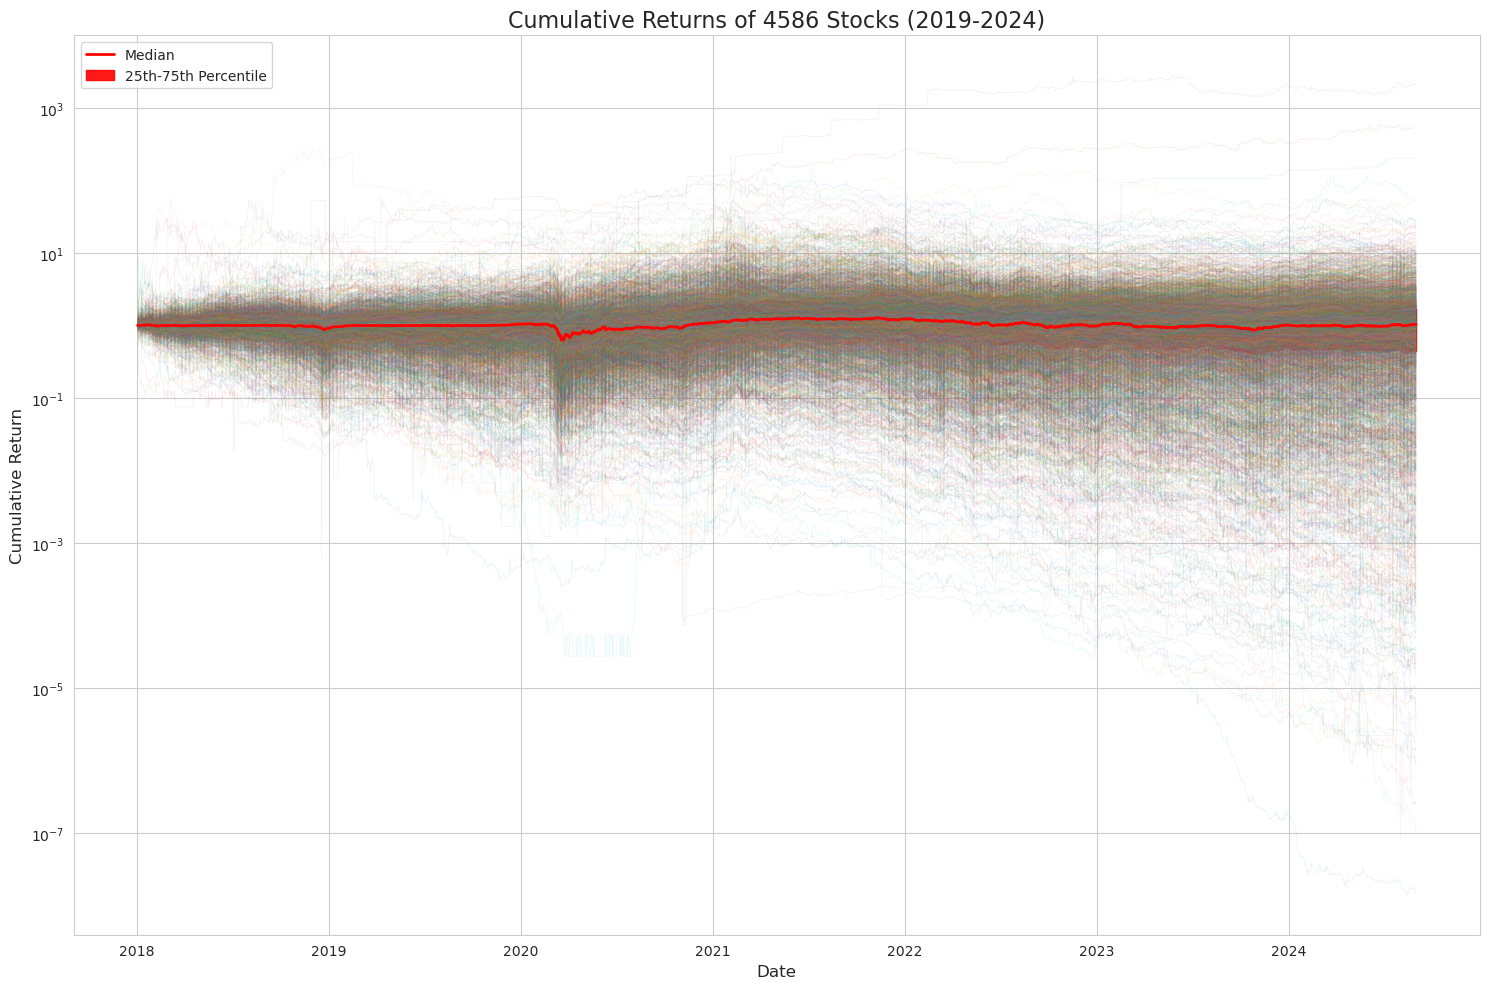

In [15]:
# 누적 수익률 계산
cumulative_returns = (1 + us_ret).cumprod()

# 그래프 스타일 설정
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# 모든 주식의 누적 수익률 그리기 (투명도를 낮게 설정)
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], alpha=0.1, linewidth=0.5)

# 중앙값 누적 수익률 계산 및 그리기
median_returns = cumulative_returns.median(axis=1)
plt.plot(cumulative_returns.index, median_returns, color='red', linewidth=2, label='Median')

# 25th 및 75th 퍼센타일 누적 수익률 계산 및 그리기
percentile_25 = cumulative_returns.quantile(0.25, axis=1)
percentile_75 = cumulative_returns.quantile(0.75, axis=1)
plt.fill_between(cumulative_returns.index, percentile_25, percentile_75, color='red', alpha=0.9, label='25th-75th Percentile')

# 그래프 설정
plt.title('Cumulative Returns of 4586 Stocks (2019-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(fontsize=10)

# y축을 로그 스케일로 설정 (선택사항)
plt.yscale('log')

# 그래프 표시
plt.tight_layout()
plt.show()